In [ ]:
import cv2,numpy as np
import tensorflow
import tensorflow.keras as keras
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import os
import matplotlib.pyplot as plt
from random import shuffle
from tqdm import tqdm

In [2]:
dir_ = r"Dataset\health"
folder = os.path.join(dir_)
counter = 1
for img in os.listdir(folder):
    old_path = os.path.join(folder,img)
    new_path = folder+"/health."+str(counter)+".jpg"
    os.rename(old_path,new_path)
    counter = counter+1

In [30]:
def name(img):
    img = img.split(".")[0]
    if img == "late_blight":
        return 2
    elif img == "septoria":
        return 1
    elif img == "health":
        return 0

In [31]:
dir_ = r"C:\Users\NOVA\Documents\Python Scripts\tomato_defect_detection\Dataset" 
data = []
cat = ["late_blight","septoria","health"]
for i in cat:
    file = os.path.join(dir_,i)
    for img in tqdm(os.listdir(file)):
        label = name(img)
        image = os.path.join(file,img)
        image = cv2.imread(image)
        image = cv2.resize(image,(50,50))
        data.append([image,label])
shuffle(data)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1273/1273 [00:09<00:00, 131.03it/s]


In [33]:
features,labels = [],[]
for feature,label in tqdm(data):
    features.append(feature)
    labels.append(label)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4218/4218 [00:00<00:00, 107457.42it/s]


In [34]:
X = np.array(features)/255
y = np.array(labels)

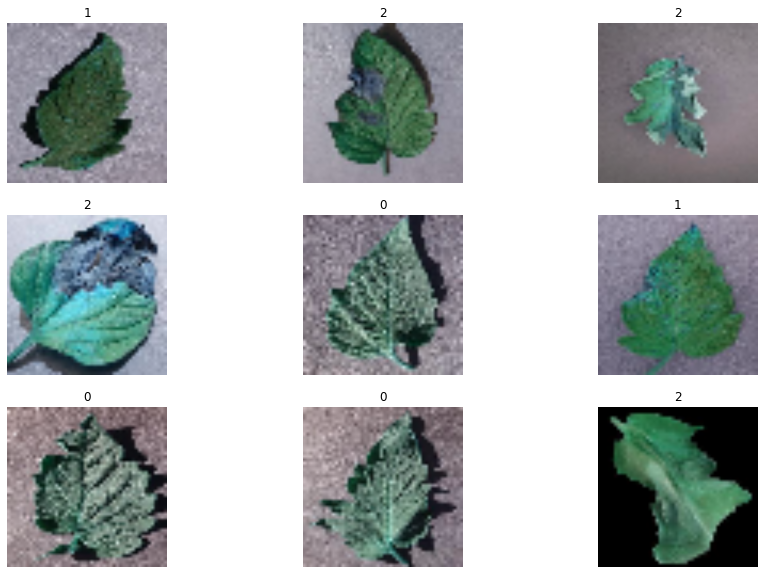

In [35]:
from tensorflow.image import resize
plt.figure(figsize=(15,10))
counter = 1
for i in range(9):
     plt.subplot(3,3,counter)
     plt.imshow(resize(X[i],(250,250)))
     plt.title(y[i])
     plt.axis("off")
     counter += 1
plt.show()

In [36]:
from tensorflow.keras.layers import Dense,MaxPooling2D,Conv2D,Flatten,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.2)

In [41]:
model = Sequential()

model.add(Conv2D(filters=64,kernel_size=(2,2),input_shape=(50,50,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(2,2),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

model.add(Dense(units=32,activation="relu"))
model.add(Dropout(rate=0.3))

model.add(Dense(units=16,activation="relu"))
model.add(Dropout(rate=0.1))

model.add(Dense(units=3,activation="softmax"))

In [42]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

In [43]:
history = model.fit(
    x = X_train,
    y = y_train,
    validation_data = (X_test,y_test),
    epochs = 15
)

Epoch 1/15
106/106 [==============================] - 28s 206ms/step - loss: 0.9941 - accuracy: 0.4695 - val_loss: 0.7740 - val_accuracy: 0.6280
Epoch 2/15
106/106 [==============================] - 19s 182ms/step - loss: 0.7124 - accuracy: 0.6805 - val_loss: 0.5764 - val_accuracy: 0.8531
Epoch 3/15
106/106 [==============================] - 18s 174ms/step - loss: 0.5275 - accuracy: 0.8207 - val_loss: 0.3164 - val_accuracy: 0.9242
Epoch 4/15
106/106 [==============================] - 18s 171ms/step - loss: 0.3896 - accuracy: 0.8729 - val_loss: 0.2219 - val_accuracy: 0.9372
Epoch 5/15
106/106 [==============================] - 18s 172ms/step - loss: 0.3117 - accuracy: 0.8998 - val_loss: 0.1905 - val_accuracy: 0.9467
Epoch 6/15
106/106 [==============================] - 18s 171ms/step - loss: 0.2851 - accuracy: 0.9149 - val_loss: 0.1214 - val_accuracy: 0.9680
Epoch 7/15
106/106 [==============================] - 19s 175ms/step - loss: 0.2543 - accuracy: 0.9143 - val_loss: 0.1160 - val_ac

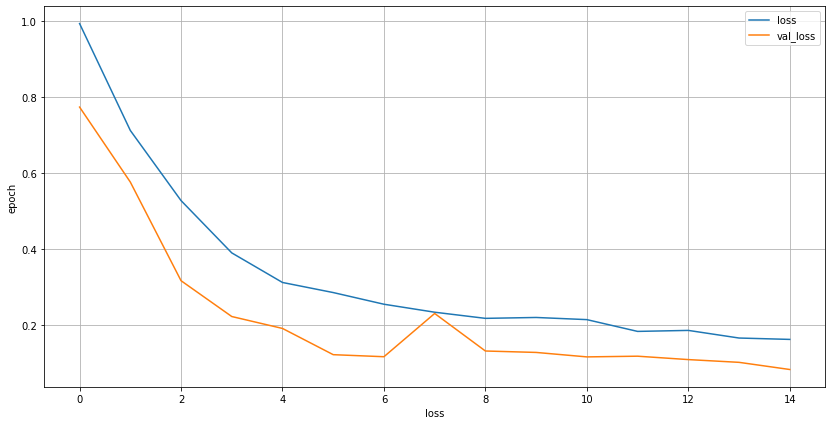

In [44]:
plt.figure(figsize=(14,7))
hist = history.history
loss = hist['loss']
val_loss = hist['val_loss']
epochs = history.epoch
plt.plot(epochs,loss,label="loss")
plt.plot(epochs,val_loss,label="val_loss")
plt.xlabel("loss")
plt.ylabel("epoch")
plt.legend(loc=0)
plt.grid()
plt.show()

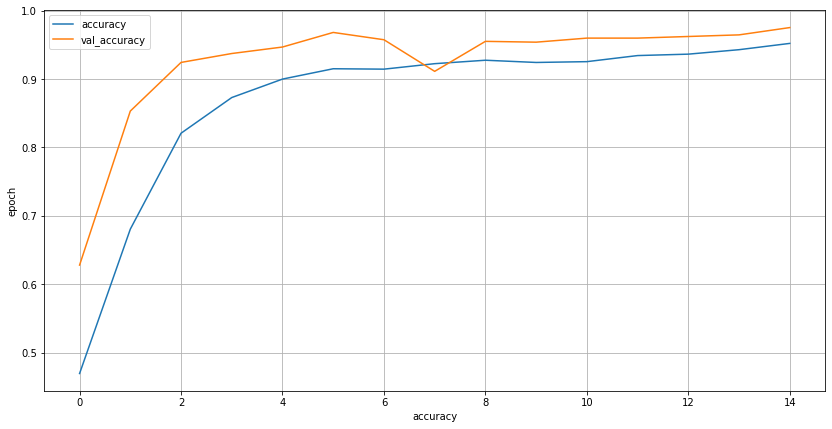

In [45]:
plt.figure(figsize=(14,7))
hist = history.history
accuracy = hist['accuracy']
val_accuracy = hist['val_accuracy']
epochs = history.epoch
plt.plot(epochs,accuracy,label="accuracy")
plt.plot(epochs,val_accuracy,label="val_accuracy")
plt.xlabel("accuracy")
plt.ylabel("epoch")
plt.legend(loc=0)
plt.grid()
plt.show()

Text(114.0, 0.5, 'Original')

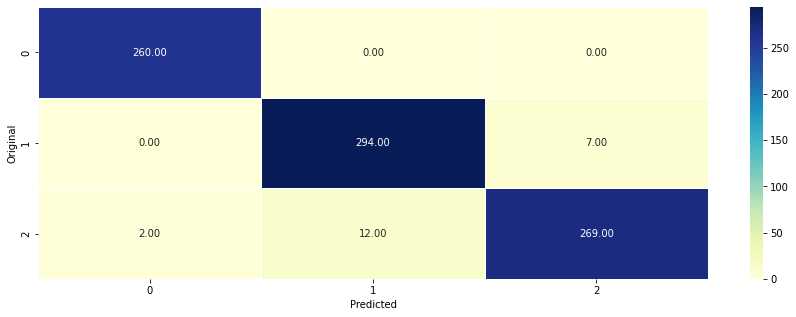

In [47]:
from sklearn.metrics import confusion_matrix
pr = model.predict(X_test)
pred = []
for i in pr:
    x = np.argmax(i)
    pred.append(x)
pred = np.array(pred)
fig,ax = plt.subplots(figsize=(15,5))
ax = sns.heatmap(confusion_matrix(y_test,pred),
                annot=True,
                linewidths=0.5,
                fmt = '.2f',
                cmap='YlGnBu'
                )
plt.xlabel('Predicted')
plt.ylabel('Original')

In [64]:
def predict(model,num):
    image = f"C:\Users\NOVA\Documents\Python Scripts\tomato_defect_detection/Dataset/health/health.{num}.jpg"
    img = cv2.imread(image)
    image = keras.preprocessing.image.load_img(image,target_size=(50,50))
    image = keras.preprocessing.image.img_to_array(image)
    image = image/255
    image = tensorflow.expand_dims(image,0)
    pred = model.predict(image)
    pred = np.argmax(pred)
    if pred == 0:
         print("healthy")
         plt.imshow(img)
         plt.axis("off")
         plt.title("Image of healthy Leaf")
    elif pred == 1:
         print("septoria")
         plt.imshow(img)
         plt.axis("off")
         plt.title("Image of Septoria Leaf")
    elif pred == 2:
         print("late_blight")
         plt.imshow(img)
#          plt.axis("off")
         plt.title("Image of late_blight Leaf")

healthy


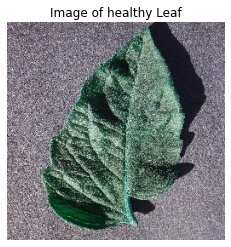

In [65]:
predict(model,2)

In [63]:
model.save("model1.h5")